# Overview
This purpose of this notebook is to implement exploratory data analysis for the benchmark data set: 1985 Auto Imports.

## DATA (https://www.openml.org/d/9)
Author: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Automobile) - 1987
Please cite:

1985 Auto Imports Database
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Several of the attributes in the database could be used as a "class" attribute.

Sources:
1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Past Usage:
Kibler,~D., Aha,~D.~W., & Albert,~M. (1989). Instance-based prediction of real-valued attributes. {it Computational Intelligence}, {it 5}, 51--57.


Attribute Information:
>
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400. 

## TODO
- TBD

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.metrics import adjusted_mutual_info_score
from IPython.display import display
from IPython.display import HTML

In [40]:
DEFAULT_FIGSIZE = (14, 14)

# Load and Inspect Original Data

In [3]:
full_data = fetch_openml(data_id=9)

In [4]:
for k, v in full_data.items():
    print(k, type(v))

data <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
feature_names <class 'list'>
DESCR <class 'str'>
details <class 'dict'>
categories <class 'dict'>
url <class 'str'>


## Inspect top level fields

In [5]:
for k, v in full_data['details'].items():
    print(k, type(v))

id <class 'str'>
name <class 'str'>
version <class 'str'>
format <class 'str'>
upload_date <class 'str'>
licence <class 'str'>
url <class 'str'>
file_id <class 'str'>
default_target_attribute <class 'str'>
version_label <class 'str'>
tag <class 'list'>
visibility <class 'str'>
status <class 'str'>
processing_date <class 'str'>
md5_checksum <class 'str'>


In [6]:
full_data['target'].shape

(205,)

In [7]:
full_data['data'].shape

(205, 25)

In [8]:
for k, v in full_data['categories'].items():
    print(k, type(v))

make <class 'list'>
fuel-type <class 'list'>
aspiration <class 'list'>
num-of-doors <class 'list'>
body-style <class 'list'>
drive-wheels <class 'list'>
engine-location <class 'list'>
engine-type <class 'list'>
num-of-cylinders <class 'list'>
fuel-system <class 'list'>


In [9]:
for k, v in full_data['categories'].items():
    print(k, '\n', v, '\n')

make 
 ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'] 

fuel-type 
 ['diesel', 'gas'] 

aspiration 
 ['std', 'turbo'] 

num-of-doors 
 ['four', 'two'] 

body-style 
 ['hardtop', 'wagon', 'sedan', 'hatchback', 'convertible'] 

drive-wheels 
 ['4wd', 'fwd', 'rwd'] 

engine-location 
 ['front', 'rear'] 

engine-type 
 ['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'] 

num-of-cylinders 
 ['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'] 

fuel-system 
 ['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'] 



In [10]:
print(len(full_data['feature_names']), 'feature names:')
for feat_name in full_data['feature_names']:
    print(feat_name)

25 feature names:
normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
wheel-base
length
width
height
curb-weight
engine-type
num-of-cylinders
engine-size
fuel-system
bore
stroke
compression-ratio
horsepower
peak-rpm
city-mpg
highway-mpg
price


#### Observations
- No provided train/test/validation partitions
- 'categories' appears to contain nominal values for all categorical features.  These feature values are probably encoded numerically in 'data' (will confirm later)
- 'data' is 2-d np.array containing 205 rows for 25 features, as advertised in openml
- 'target' contains the 205 rows for feature 1 (symboling) as 1-d np.array

## Preliminary quality control on data

In [11]:
# - Combine target data and rest of 'data'
data_values = np.concatenate(
    (np.reshape(full_data['target'], (len(full_data['target']), 1)), full_data['data']), 
    axis=1)
# - Concatenate column names too
all_cols = ['symboling']
all_cols.extend(full_data['feature_names'])

In [12]:
full_df = pd.DataFrame(data_values, columns=all_cols)

### Since data set is small, visually inspect the whole thing

In [13]:
display(HTML(full_df.to_html()))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,1,4,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9,111,5000,21,27,13495
1,3,NaN,0,1,0,1,4,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9,111,5000,21,27,16500
2,1,NaN,0,1,0,1,3,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9,154,5000,19,26,16500
3,2,164,1,1,0,0,2,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.4,10,102,5500,24,30,13950
4,2,164,1,1,0,0,2,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.4,8,115,5500,18,22,17450
5,2,NaN,1,1,0,1,2,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,1,1,0,0,2,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,1,1,0,0,1,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,1,1,1,0,2,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,1,1,1,1,3,0,0,99.5,178.2,67.9,52,3053,3,1,131,5,3.13,3.4,7,160,5500,16,22,NaN


### Show which columns contain NaN 

In [14]:
full_df.isna().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [15]:
# Count of NaN by column
full_df.isna().apply(lambda x: np.sum(x), axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Observations
- There are only a few NaNs among the features I care about.  It might be OK to remove those rows or features for my analysis.

### Visualize distribution of values for each feature

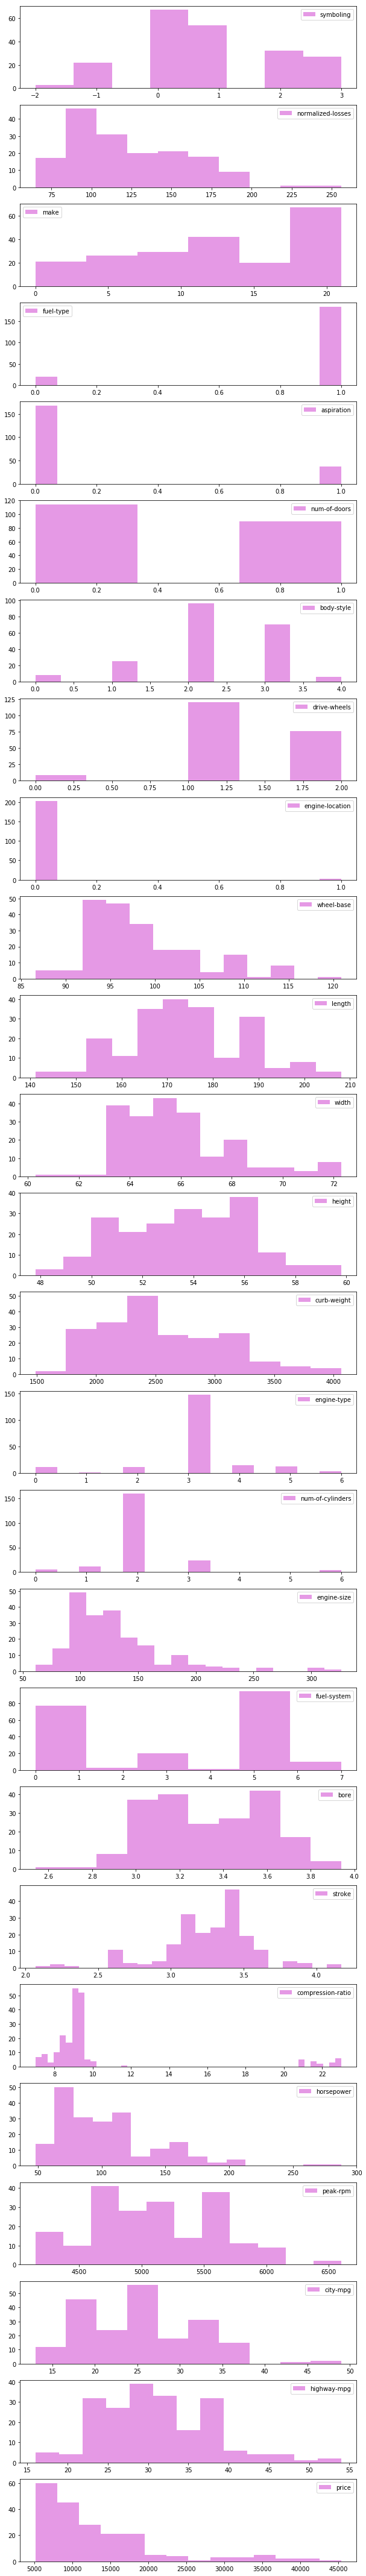

In [16]:
# Set up the matplotlib figure
num_plots = full_df.shape[1]
f, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3))

for ind, item in enumerate(full_df.iteritems()):
    try:
        # Make hist plot
        sns.distplot(item[1], color="m", kde=False, ax=axes[ind])
        # Replace default x label with legend because space is tight
        axes[ind].set_xlabel('', fontsize=1)
        axes[ind].legend([item[0]])
    except:
        print(f"Barfed on f{item[1]}")

#### Observations
- "make" does not have a uniform distribution
 - If I use this as target variable in classification, I may have issues with class imbalance, especially because of the small number of training rows
- The following categorical attributes all have substantial imbalance:
 - make
 - fuel-type
 - aspiration
 - body-style
 - drive-wheels
 - engine-location
 - engine-type
 - num-of-cyclinders
 - fuel-system

### Visualize mutual information and correlation among all attributes
- recipe borrowed from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
- Use mutual information in addition to correlation because so many of the features are categorical, with arbitrary numeric encoding
- MI is mostly interesting among catagorical features, correlation is mostly interesting among the continuous features

In [29]:
# First, let's discard the problematic NaN-containing rows and columns
clean_df = full_df.drop(columns=['normalized-losses'])
clean_df = clean_df[~clean_df.isna().any(axis=1)].infer_objects()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    object 
 1   make               193 non-null    float64
 2   fuel-type          193 non-null    float64
 3   aspiration         193 non-null    float64
 4   num-of-doors       193 non-null    float64
 5   body-style         193 non-null    float64
 6   drive-wheels       193 non-null    float64
 7   engine-location    193 non-null    float64
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    float64
 13  engine-type        193 non-null    float64
 14  num-of-cylinders   193 non-null    float64
 15  engine-size        193 non-null    float64
 16  fuel-system        193 non

In [46]:
def plot_feature_associations(corr_df):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_df, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

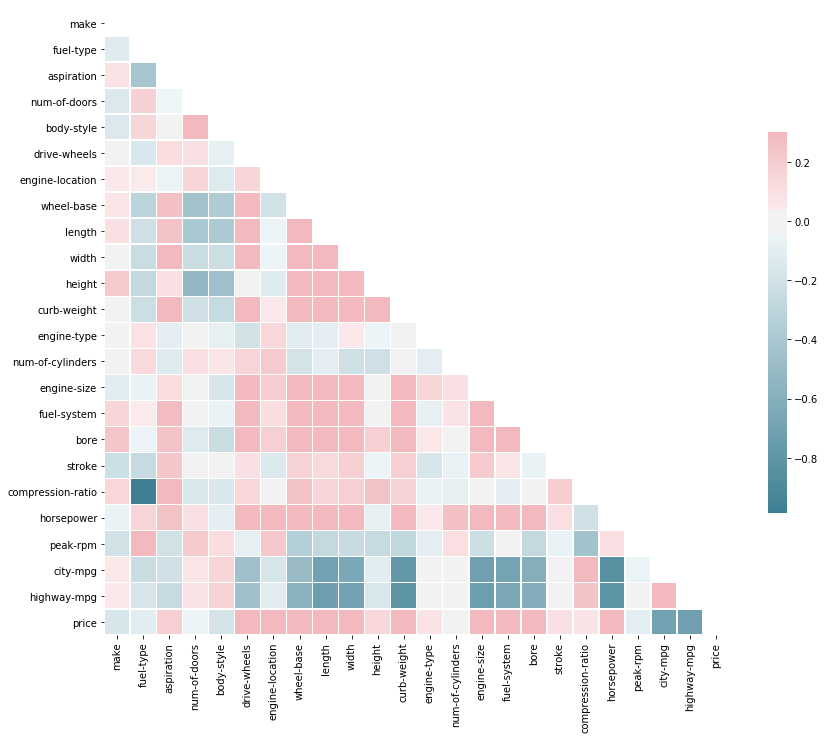

In [47]:
# Compute the pearson correlation matrix
corr_df = clean_df.corr(method='pearson')
plot_feature_associations(corr_df)

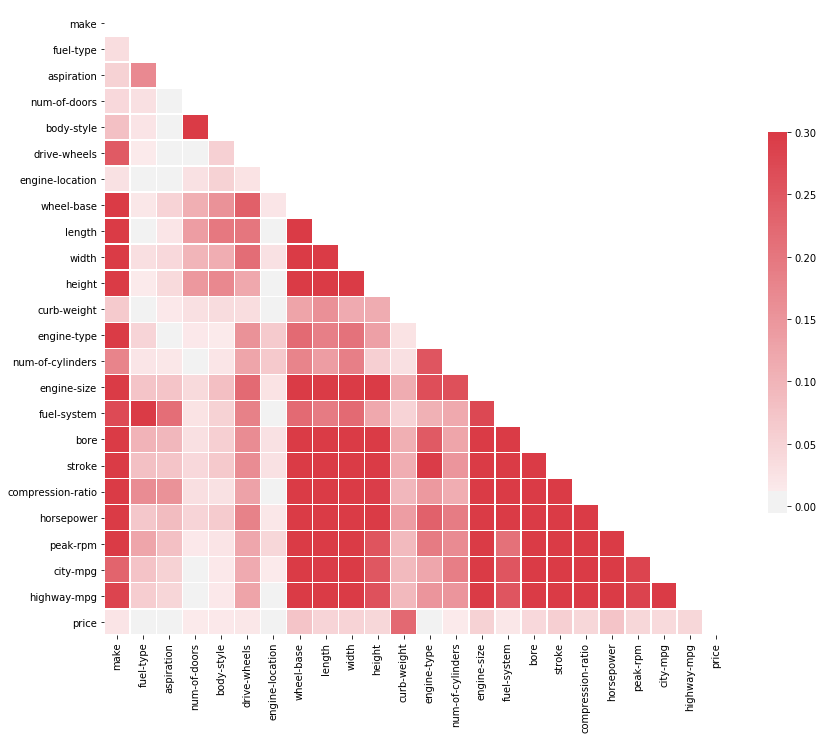

In [48]:
# Compute the mutual information matrix
corr_df = clean_df.corr(method=lambda a, b: adjusted_mutual_info_score(a, b, average_method='arithmetic'))
plot_feature_associations(corr_df)

#### Observations
1. The range of scores seem a little lower than expected. E.g.: 
 - It makes sense that some combinations are relatively high (body-style x num-of-doors, length x wheel-base)
 - It is surprising that these scores are not greater than 0.3
2. While accounting for observation 1., these scores confirm the earlier hunch that a lot of these attributes are "strongly correlated" 